<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [6]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(URL)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [4]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
import pandas as pd

file_path = "dataset.csv"

# Read the CSV file into a Pandas data frame
df = pd.read_csv(file_path)

df

<ipython-input-4-4b0db5ca4151>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,IPS Panel,2,1,7,35.560,2.6,8,256,1.70,1891
234,234,Toshiba,3,Full HD,2,1,5,33.782,2.4,8,256,1.20,1950
235,235,Lenovo,4,IPS Panel,2,1,5,30.480,2.6,8,256,1.36,2236
236,236,Lenovo,3,Full HD,3,1,5,39.624,2.5,6,256,2.40,883


In [5]:
missing_cols = df.columns[df.isnull().any()]
missing_cols

Index(['Screen_Size_cm', 'Weight_kg'], dtype='object')

In [6]:
# Replace missing values in 'Screen_Size_cm' with the most frequent value
most_frequent_screen_size = df['Screen_Size_cm'].mode()[0]
df['Screen_Size_cm'].fillna(most_frequent_screen_size, inplace=True)

# Replace missing values in 'Weight_kg' with the mean value
mean_weight = df['Weight_kg'].mean()
df['Weight_kg'].fillna(mean_weight, inplace=True)

print("Data frame with missing values replaced:")
print(df)

<ipython-input-6-8d4a30bd2754>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Screen_Size_cm'].fillna(most_frequent_screen_size, inplace=True)
<ipython-input-6-8d4a30bd2754>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Data frame with missing values replaced:
     Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0             0         Acer         4  IPS Panel    2   1         5   
1             1         Dell         3    Full HD    1   1         3   
2             2         Dell         3    Full HD    1   1         7   
3             3         Dell         4  IPS Panel    2   1         5   
4             4           HP         4    Full HD    2   1         7   
..          ...          ...       ...        ...  ...  ..       ...   
233         233       Lenovo         4  IPS Panel    2   1         7   
234         234      Toshiba         3    Full HD    2   1         5   
235         235       Lenovo         4  IPS Panel    2   1         5   
236         236       Lenovo         3    Full HD    3   1         5   
237         237      Toshiba         3    Full HD    2   1         5   

     Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0            35

In [7]:
# Change data type of 'Screen_Size_cm' to float
df['Screen_Size_cm'] = df['Screen_Size_cm'].astype(float)

# Change data type of 'Weight_kg' to float
df['Weight_kg'] = df['Weight_kg'].astype(float)

df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [8]:
# Convert 'Screen_Size_cm' from centimeters to inches
df['Screen_Size_inch'] = df['Screen_Size_cm'] * 0.393701

# Convert 'Weight_kg' from kilograms to pounds
df['Weight_pounds'] = df['Weight_kg'] * 2.20462

# Drop the original columns
df.drop(['Screen_Size_cm', 'Weight_kg'], axis=1, inplace=True)

df

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Screen_Size_inch,Weight_pounds
0,0,Acer,4,IPS Panel,2,1,5,1.6,8,256,978,14.000008,3.527392
1,1,Dell,3,Full HD,1,1,3,2.0,4,256,634,15.600008,4.850164
2,2,Dell,3,Full HD,1,1,7,2.7,8,256,946,15.600008,4.850164
3,3,Dell,4,IPS Panel,2,1,5,1.6,8,128,1244,13.300007,2.689636
4,4,HP,4,Full HD,2,1,7,1.8,8,256,837,15.600008,4.210824
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,IPS Panel,2,1,7,2.6,8,256,1891,14.000008,3.747854
234,234,Toshiba,3,Full HD,2,1,5,2.4,8,256,1950,13.300007,2.645544
235,235,Lenovo,4,IPS Panel,2,1,5,2.6,8,256,2236,12.000006,2.998283
236,236,Lenovo,3,Full HD,3,1,5,2.5,6,256,883,15.600008,5.291088


In [15]:
# Normalize the "CPU_frequency" attribute
max_freq = df['CPU_frequency'].max()
df['CPU_frequency'] = df['CPU_frequency'] / max_freq

df

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Screen_Size_inch,Weight_pounds
0,0,Acer,4,IPS Panel,2,1,5,0.551724,8,256,978,14.000008,3.527392
1,1,Dell,3,Full HD,1,1,3,0.689655,4,256,634,15.600008,4.850164
2,2,Dell,3,Full HD,1,1,7,0.931034,8,256,946,15.600008,4.850164
3,3,Dell,4,IPS Panel,2,1,5,0.551724,8,128,1244,13.300007,2.689636
4,4,HP,4,Full HD,2,1,7,0.620690,8,256,837,15.600008,4.210824
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,IPS Panel,2,1,7,0.896552,8,256,1891,14.000008,3.747854
234,234,Toshiba,3,Full HD,2,1,5,0.827586,8,256,1950,13.300007,2.645544
235,235,Lenovo,4,IPS Panel,2,1,5,0.896552,8,256,2236,12.000006,2.998283
236,236,Lenovo,3,Full HD,3,1,5,0.862069,6,256,883,15.600008,5.291088


In [9]:
# Convert "Screen" attribute into indicator variables
df1 = pd.get_dummies(df['Screen'], prefix='Screen')

# Append df1 into the original DataFrame df
df = pd.concat([df, df1], axis=1)

# Drop the original attribute "Screen" from the DataFrame df
df.drop('Screen', axis=1, inplace=True)

df

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Screen_Size_inch,Weight_pounds,Screen_Full HD,Screen_IPS Panel
0,0,Acer,4,2,1,5,1.6,8,256,978,14.000008,3.527392,False,True
1,1,Dell,3,1,1,3,2.0,4,256,634,15.600008,4.850164,True,False
2,2,Dell,3,1,1,7,2.7,8,256,946,15.600008,4.850164,True,False
3,3,Dell,4,2,1,5,1.6,8,128,1244,13.300007,2.689636,False,True
4,4,HP,4,2,1,7,1.8,8,256,837,15.600008,4.210824,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,2,1,7,2.6,8,256,1891,14.000008,3.747854,False,True
234,234,Toshiba,3,2,1,5,2.4,8,256,1950,13.300007,2.645544,True,False
235,235,Lenovo,4,2,1,5,2.6,8,256,2236,12.000006,2.998283,False,True
236,236,Lenovo,3,3,1,5,2.5,6,256,883,15.600008,5.291088,True,False


In [17]:
# Conversion rate from USD to Euros
conversion_rate = 0.85

# Convert values from USD to Euros
df['Price'] = df['Price'] * conversion_rate

# Display the updated DataFrame
df

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Screen_Size_inch,Weight_pounds,Screen_Full HD,Screen_IPS Panel
0,0,Acer,4,2,1,5,0.551724,8,256,831.30,14.000008,3.527392,False,True
1,1,Dell,3,1,1,3,0.689655,4,256,538.90,15.600008,4.850164,True,False
2,2,Dell,3,1,1,7,0.931034,8,256,804.10,15.600008,4.850164,True,False
3,3,Dell,4,2,1,5,0.551724,8,128,1057.40,13.300007,2.689636,False,True
4,4,HP,4,2,1,7,0.620690,8,256,711.45,15.600008,4.210824,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,2,1,7,0.896552,8,256,1607.35,14.000008,3.747854,False,True
234,234,Toshiba,3,2,1,5,0.827586,8,256,1657.50,13.300007,2.645544,True,False
235,235,Lenovo,4,2,1,5,0.896552,8,256,1900.60,12.000006,2.998283,False,True
236,236,Lenovo,3,3,1,5,0.862069,6,256,750.55,15.600008,5.291088,True,False


In [10]:
# Min-max normalization for "CPU_frequency" attribute
min_freq = df['CPU_frequency'].min()
max_freq = df['CPU_frequency'].max()
df['CPU_frequency'] = (df['CPU_frequency'] - min_freq) / (max_freq - min_freq)

df

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Screen_Size_inch,Weight_pounds,Screen_Full HD,Screen_IPS Panel
0,0,Acer,4,2,1,5,0.235294,8,256,978,14.000008,3.527392,False,True
1,1,Dell,3,1,1,3,0.470588,4,256,634,15.600008,4.850164,True,False
2,2,Dell,3,1,1,7,0.882353,8,256,946,15.600008,4.850164,True,False
3,3,Dell,4,2,1,5,0.235294,8,128,1244,13.300007,2.689636,False,True
4,4,HP,4,2,1,7,0.352941,8,256,837,15.600008,4.210824,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,2,1,7,0.823529,8,256,1891,14.000008,3.747854,False,True
234,234,Toshiba,3,2,1,5,0.705882,8,256,1950,13.300007,2.645544,True,False
235,235,Lenovo,4,2,1,5,0.823529,8,256,2236,12.000006,2.998283,False,True
236,236,Lenovo,3,3,1,5,0.764706,6,256,883,15.600008,5.291088,True,False


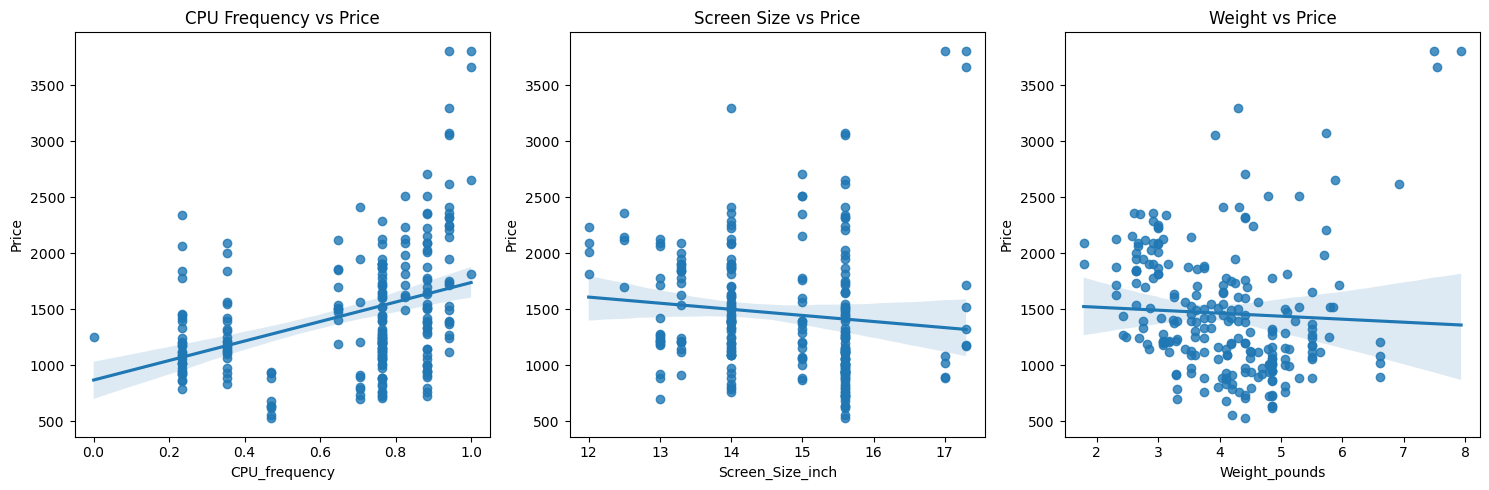

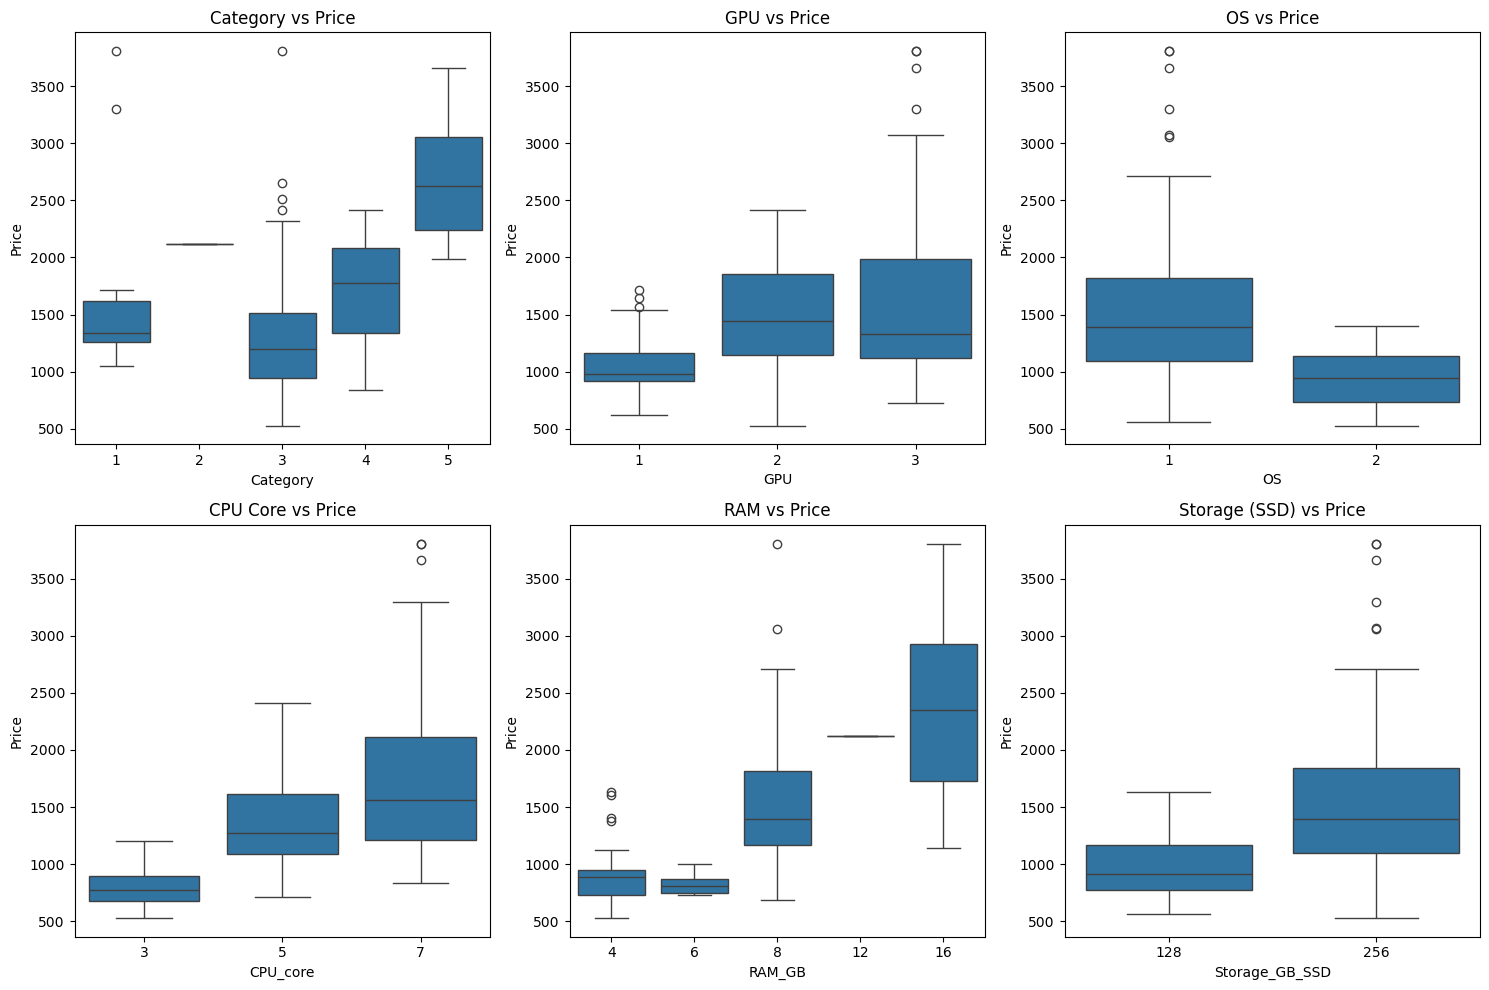

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
data = df

# Regression plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.regplot(x='CPU_frequency', y='Price', data=data)
plt.title('CPU Frequency vs Price')

plt.subplot(1, 3, 2)
sns.regplot(x='Screen_Size_inch', y='Price', data=data)
plt.title('Screen Size vs Price')

plt.subplot(1, 3, 3)
sns.regplot(x='Weight_pounds', y='Price', data=data)
plt.title('Weight vs Price')

plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='Category', y='Price', data=data)
plt.title('Category vs Price')

plt.subplot(2, 3, 2)
sns.boxplot(x='GPU', y='Price', data=data)
plt.title('GPU vs Price')

plt.subplot(2, 3, 3)
sns.boxplot(x='OS', y='Price', data=data)
plt.title('OS vs Price')

plt.subplot(2, 3, 4)
sns.boxplot(x='CPU_core', y='Price', data=data)
plt.title('CPU Core vs Price')

plt.subplot(2, 3, 5)
sns.boxplot(x='RAM_GB', y='Price', data=data)
plt.title('RAM vs Price')

plt.subplot(2, 3, 6)
sns.boxplot(x='Storage_GB_SSD', y='Price', data=data)
plt.title('Storage (SSD) vs Price')

plt.tight_layout()
plt.show()

In [12]:
import numpy as np
from scipy.stats import pearsonr

# Assuming your dataframe has a target attribute 'Price'
df = pd.read_csv('dataset.csv')

# Select numerical attributes
numerical_attributes = df.select_dtypes(include=np.number)

# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['Price'].drop('Price')

# Calculate Pearson coefficient and p-values for all numerical attributes against 'Price'
pearson_coefficients = []
p_values = []

for column in numerical_attributes.columns:
    if column != 'Price':
        pearson_coefficient, p_value = pearsonr(numerical_attributes[column], df['Price'])
        pearson_coefficients.append(pearson_coefficient)
        p_values.append(p_value)

# Create a new dataframe to store the results
results_df = pd.DataFrame({'Attribute': correlation_values.index, 'Correlation Value': correlation_values, 'Pearson Coefficient': pearson_coefficients, 'P-value': p_values})

# Print the results
print(results_df)

<class 'ValueError'>: array must not contain infs or NaNs

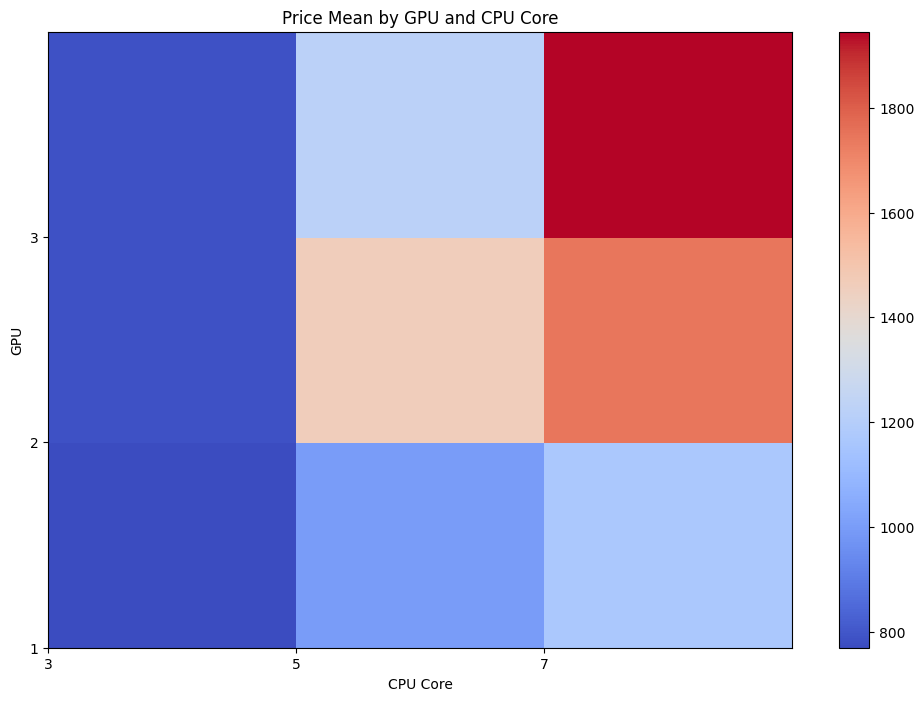

In [13]:

# Group the attributes GPU, CPU_core, and Price
grouped_data = data.groupby(['GPU', 'CPU_core'])['Price'].mean().reset_index()

# Create a pivot table
pivot_table = grouped_data.pivot(index='GPU', columns='CPU_core', values='Price')

# Plot a pcolor plot for the pivot table
plt.figure(figsize=(12, 8))
plt.pcolor(pivot_table, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.title('Price Mean by GPU and CPU Core')
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = data
# Define your source and target variables
X = data['CPU_frequency'].values.reshape(-1, 1) #Elegir columna
y = data['Price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE and R^2 values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 239035.99429436043
R^2 Score: -0.03719417833496497


In [17]:
# Define your source and target variables
X = data[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']].values
y = data['Price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE and R^2 values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 168575.62043820205
R^2 Score: 0.2685383946302474


In [19]:
from sklearn.preprocessing import PolynomialFeatures

# Define your source and target variables
X = data['CPU_frequency'].values.reshape(-1, 1)
y = data['Price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train polynomial regression models of different orders
orders = [2, 3, 5]
for order in orders:
    poly_features = PolynomialFeatures(degree=order)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_pred = model.predict(X_poly_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Polynomial Regression Model (Order {order}):')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print('------------------')

Polynomial Regression Model (Order 2):
Mean Squared Error: 196263.56145771235
R^2 Score: 0.14839844951322245
------------------
Polynomial Regression Model (Order 3):
Mean Squared Error: 205918.03020814923
R^2 Score: 0.10650702302563331
------------------
Polynomial Regression Model (Order 5):
Mean Squared Error: 207335.70360913422
R^2 Score: 0.10035563732063679
------------------


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define your source and target variables
X = data[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']].values
y = data['Price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for parameter scaling, polynomial feature generation, and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_reg', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate MSE and R^2 values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 4.655145632056932e+30
R^2 Score: -2.0199007949091977e+25


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# Define your source and target variables
X = data[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']].values
y = data['Price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with polynomial features and Ridge regression
pipeline = make_pipeline(PolynomialFeatures(), Ridge())
param_grid = {
    'polynomialfeatures__degree': [2, 3, 5],
    'ridge__alpha': [0.0001,0.001,0.01, 0.1, 1, 10]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=4)
grid_search.fit(X_train, y_train)

# Make predictions
y_pred = grid_search.predict(X_test)

# Calculate MSE and R^2 values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.70217e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.29233e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.18918e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.09917e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.31305e-19): res

Mean Squared Error: 238111.19950789222
R^2 Score: -0.03318142798951618


In [13]:
## FINAL PROJECT:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

In [14]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

In [15]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(URL)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset_final.csv")

In [65]:
# 1. Read the CSV file into a pandas data frame

df = pd.read_csv("dataset_final.csv")

# 2. Print the first 5 rows of the dataframe
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [66]:
# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

# Replace missing values with the mean value of the column
for column in columns_with_missing_values:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

# Delete duplicate entries from the data frame
df.drop_duplicates(inplace=True)

df

<ipython-input-66-a3e918298e50>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150.0,47.1,1.4,8999
17962,B-MAX,2014,Manual,40700,Petrol,30.0,57.7,1.0,7499
17963,Focus,2015,Manual,7010,Diesel,20.0,67.3,1.6,9999
17964,KA,2018,Manual,5007,Petrol,145.0,57.7,1.2,8299


In [67]:
df['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other'], dtype=object)

In [63]:
# Convert string columns to numerical values using label encoding
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

# Calculate the correlation matrix
corr_matrix = df.corr()

# Sort the correlation values for the target attribute in descending order
corr_with_target = corr_matrix['price'].sort_values(ascending=False)

# Get the top 5 attributes with highest correlation
top_5_attributes = corr_with_target[1:6]  # Exclude the target attribute itself

print(top_5_attributes)

year            0.635715
engineSize      0.411451
tax             0.405970
model           0.316116
transmission   -0.058603
Name: price, dtype: float64


In [68]:
#reload the dataframe to see the names of the fuel types
# Count the number of entries for each unique value of a specific attribute, for example 'fuelType'
value_counts = df['fuelType'].value_counts()

for value, count in value_counts.items():
    print(f"Number of entries with fuel type '{value}': {count}")

Number of entries with fuel type 'Petrol': 12081
Number of entries with fuel type 'Diesel': 5706
Number of entries with fuel type 'Hybrid': 22
Number of entries with fuel type 'Electric': 2
Number of entries with fuel type 'Other': 1


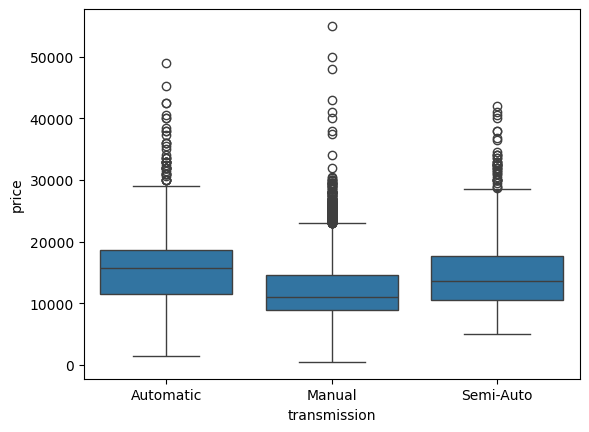

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your data frame and 'source_column' and 'target_column' are the source and target attributes
sns.boxplot(x='transmission', y='price', data=df)
plt.show()

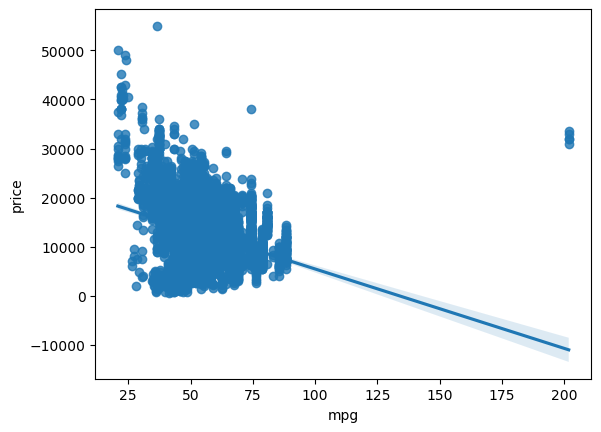

In [70]:
# Assuming 'df' is your data frame and 'source_column' and 'target_column' are the source and target attributes
sns.regplot(x='mpg', y='price', data=df)
plt.show()

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Extract the source and target variables
X = df[['mpg']]
y = df['price']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R^2 value
r2 = r2_score(y, y_pred)

# Calculate MSE value
mse = mean_squared_error(y, y_pred)

print("R^2 value:", r2)
print("MSE value:", mse)

R^2 value: 0.1198980224962416
MSE value: 19741690.809446193


In [73]:
# Extract the source variables and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R^2 value
r2 = r2_score(y, y_pred)

# Calculate MSE value
mse = mean_squared_error(y, y_pred)

print("R^2 value:", r2)
print("MSE value:", mse)

R^2 value: 0.7265379654547005
MSE value: 6134065.224381731


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


# Extract the source attributes and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Create a pipeline with StandardScaler, PolynomialFeatures, and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_reg', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X, y)

# Make predictions
y_pred = pipeline.predict(X)

# Calculate R^2 value
r2 = r2_score(y, y_pred)

# Calculate MSE value
mse = mean_squared_error(y, y_pred)

print("R^2 value:", r2)
print("MSE value:", mse)

R^2 value: 0.7666619695239302
MSE value: 5234038.06546274


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Define source attributes and target attribute
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit a Ridge regression model with regularization parameter = 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ridge_model.predict(X_test)

# Calculate R^2 value
r2 = r2_score(y_test, y_pred)

# Calculate MSE value
mse = mean_squared_error(y_test, y_pred)

print("R^2 value for Ridge Regression model:", r2)
print("MSE value for Ridge Regression model:", mse)

R^2 value for Ridge Regression model: 0.7165877117196082
MSE value for Ridge Regression model: 6195670.808920691


In [76]:
from sklearn.preprocessing import PolynomialFeatures

# Apply second degree polynomial scaling to the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a Ridge regression model with regularization parameter = 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Make predictions on the testing data
y_pred = ridge_model.predict(X_test_poly)

# Calculate R^2 value
r2 = r2_score(y_test, y_pred)

# Calculate MSE value
mse = mean_squared_error(y_test, y_pred)

print("R^2 value for Ridge Regression model:", r2)
print("MSE value for Ridge Regression model:", mse)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.29602e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


R^2 value for Ridge Regression model: 0.7531276972610705
MSE value for Ridge Regression model: 5396870.8586741965


In [77]:
from sklearn.model_selection import GridSearchCV

# Create Ridge regression model
ridge = Ridge()
parameters = {'alpha': [0.1, 1, 10]}  # Set of values for the parameter alpha

# Perform Grid Search with Cross Validation
ridge_grid = GridSearchCV(ridge, parameters, cv=5)
ridge_grid.fit(X_train_poly, y_train)

# Make predictions on the testing data
y_pred = ridge_grid.predict(X_test_poly)

# Calculate R^2 value
r2 = r2_score(y_test, y_pred)

# Calculate MSE value
mse = mean_squared_error(y_test, y_pred)

print("R^2 value for Ridge Regression model:", r2)
print("MSE value for Ridge Regression model:", mse)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.83924e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.89855e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.88243e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.8295e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.90222e-24): resu

R^2 value for Ridge Regression model: 0.7541445553610329
MSE value for Ridge Regression model: 5374641.34249839


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
